Since I have very less time to complete all the projects, I'm not writing much md in this notebook,

So please try to understand.

 In this file, I'm basically reviewing the dataset, doing feature engineering, model training and checking their efficiency and evaluating them, then storing them pkl file.

Then I'm opening and using the model in predictor.ipynb file to predict the prices of properties.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1)
Y = data['median_house_value']

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [9]:
train_data = X_train.join(Y_train)

In [10]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17500,-119.79,34.43,26.0,3611.0,563.0,2089.0,540.0,5.1615,NEAR OCEAN,276200.0
16002,-122.45,37.75,36.0,1997.0,356.0,772.0,348.0,4.9500,NEAR BAY,322600.0
4314,-118.33,34.09,40.0,2004.0,687.0,1514.0,542.0,1.9911,<1H OCEAN,220000.0
19079,-122.49,38.32,17.0,3308.0,720.0,1587.0,632.0,3.2727,<1H OCEAN,176000.0
4849,-118.31,34.02,52.0,1832.0,441.0,1186.0,420.0,1.2434,<1H OCEAN,98400.0
...,...,...,...,...,...,...,...,...,...,...
2446,-119.61,36.56,34.0,1911.0,497.0,1886.0,481.0,1.6250,INLAND,53000.0
5930,-117.79,34.11,18.0,3814.0,721.0,1881.0,692.0,4.4722,INLAND,215600.0
9885,-121.77,36.71,18.0,6601.0,1395.0,3562.0,1299.0,3.5120,<1H OCEAN,174800.0
7165,-118.17,34.05,35.0,1256.0,294.0,2990.0,302.0,3.1528,<1H OCEAN,121800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

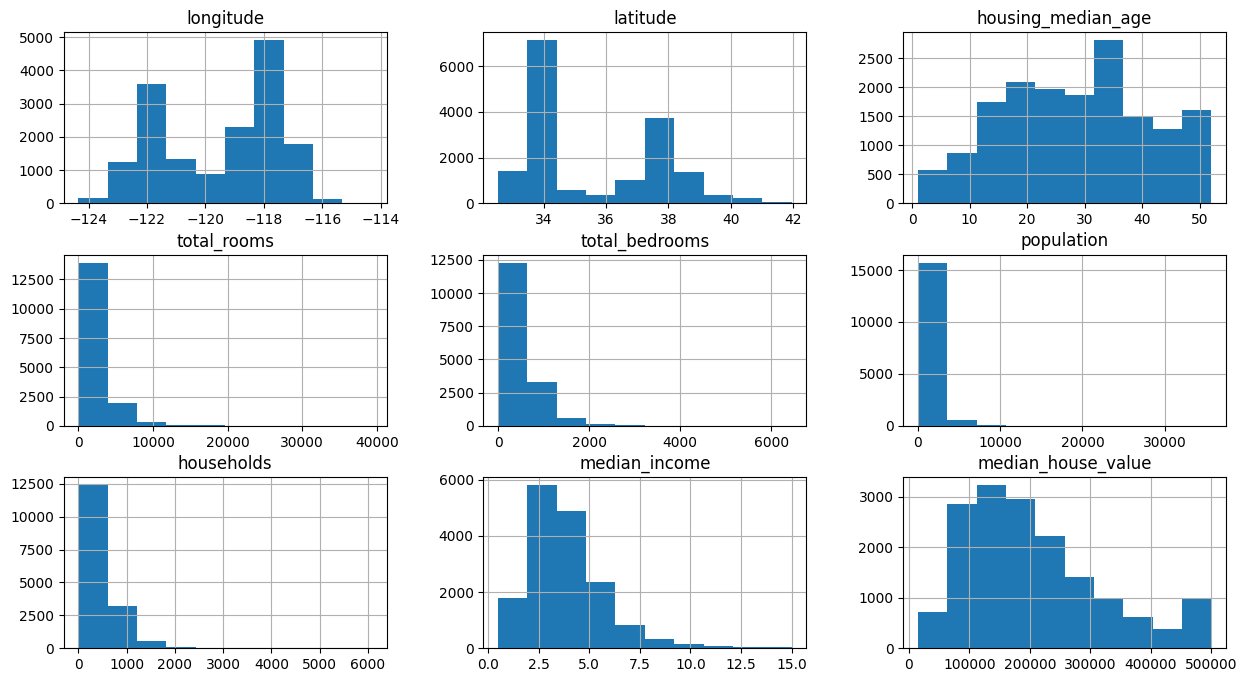

In [11]:
train_data.hist(figsize=(15,8))

<Axes: >

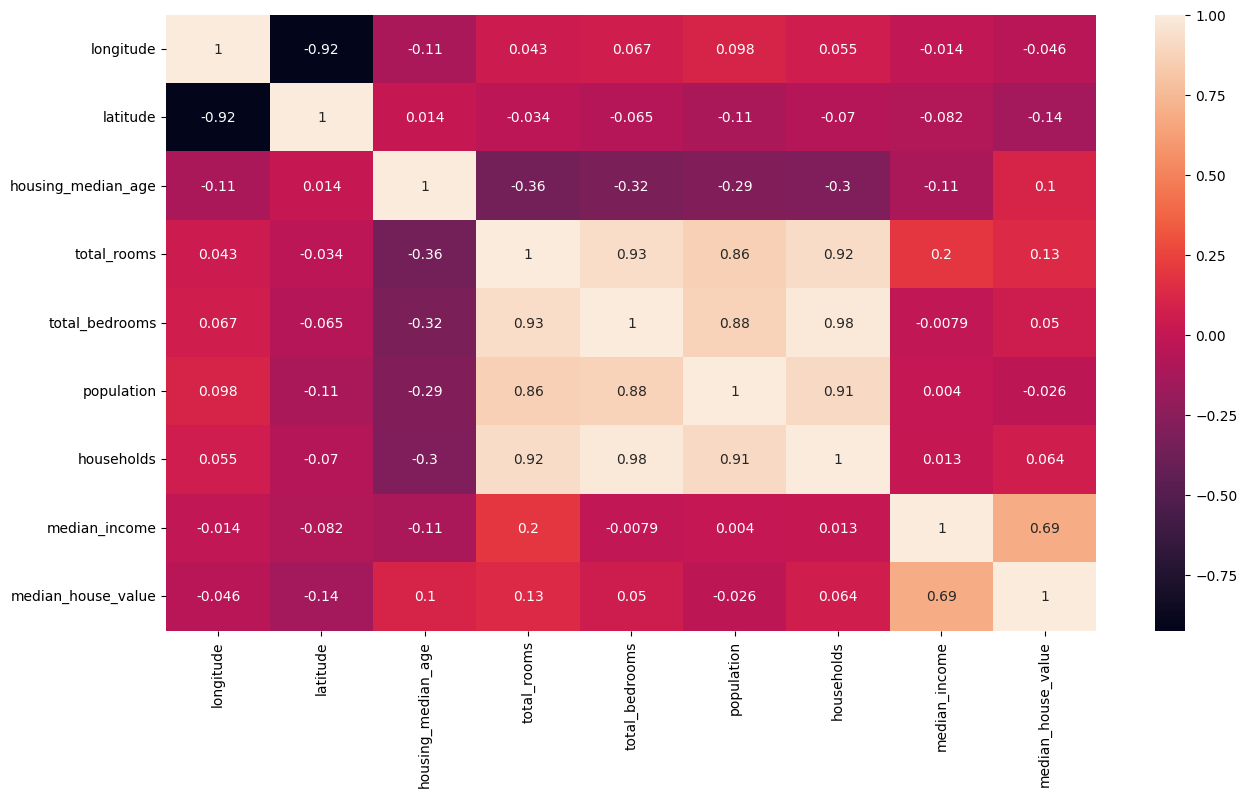

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True)

In [13]:
train_data['total_rooms'] = np.log(train_data['total_rooms']) + 1
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']) + 1
train_data['population'] = np.log(train_data['population']) + 1
train_data['households'] = np.log(train_data['households']) + 1

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

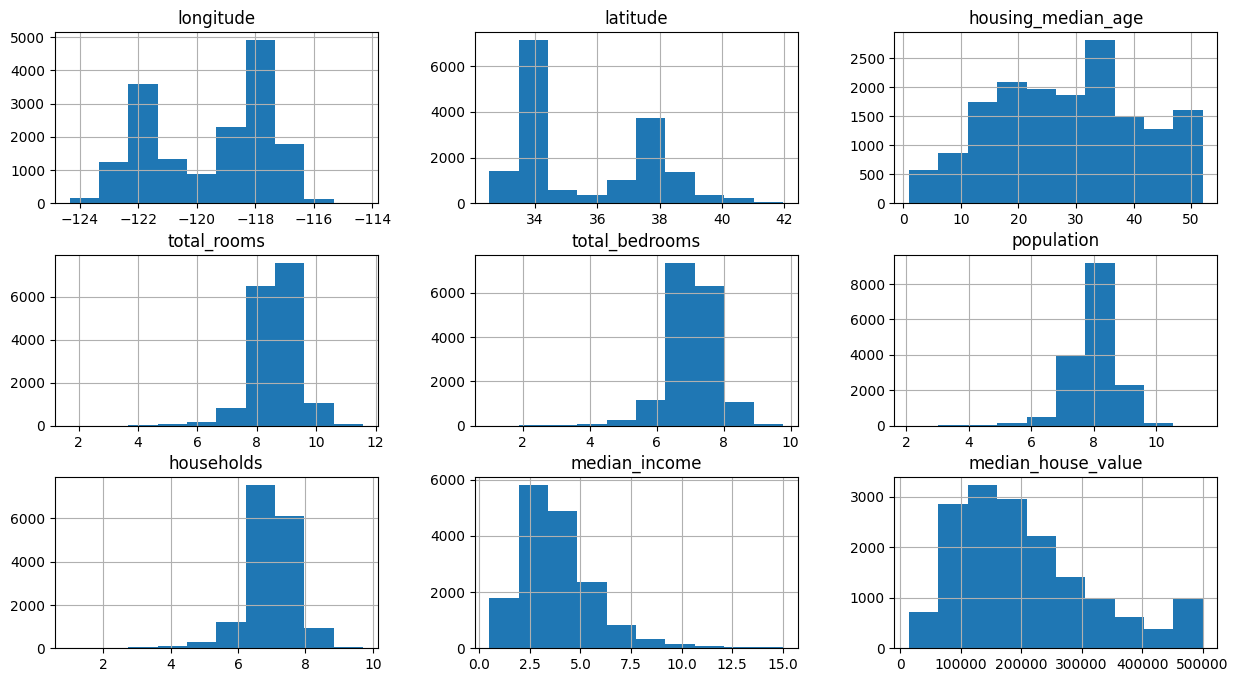

In [14]:
train_data.hist(figsize=(15, 8))

In [15]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [16]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17500,-119.79,34.43,26.0,9.191740,7.333280,8.644441,7.291569,5.1615,276200.0,False,False,False,False,True
16002,-122.45,37.75,36.0,8.599401,6.874931,7.648985,6.852202,4.9500,322600.0,False,False,False,True,False
4314,-118.33,34.09,40.0,8.602900,7.532334,8.322510,7.295266,1.9911,220000.0,True,False,False,False,False
19079,-122.49,38.32,17.0,9.104099,7.579251,8.369601,7.448889,3.2727,176000.0,True,False,False,False,False
4849,-118.31,34.02,52.0,8.513164,7.089045,8.078342,7.040255,1.2434,98400.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,-119.61,36.56,34.0,8.555382,7.208590,8.542213,7.175867,1.6250,53000.0,False,True,False,False,False
5930,-117.79,34.11,18.0,9.246434,7.580639,8.539559,7.539586,4.4722,215600.0,False,True,False,False,False
9885,-121.77,36.71,18.0,9.794976,8.240650,9.178077,8.169350,3.5120,174800.0,True,False,False,False,False
7165,-118.17,34.05,35.0,8.135687,6.683580,9.003029,6.710427,3.1528,121800.0,True,False,False,False,False


<Axes: >

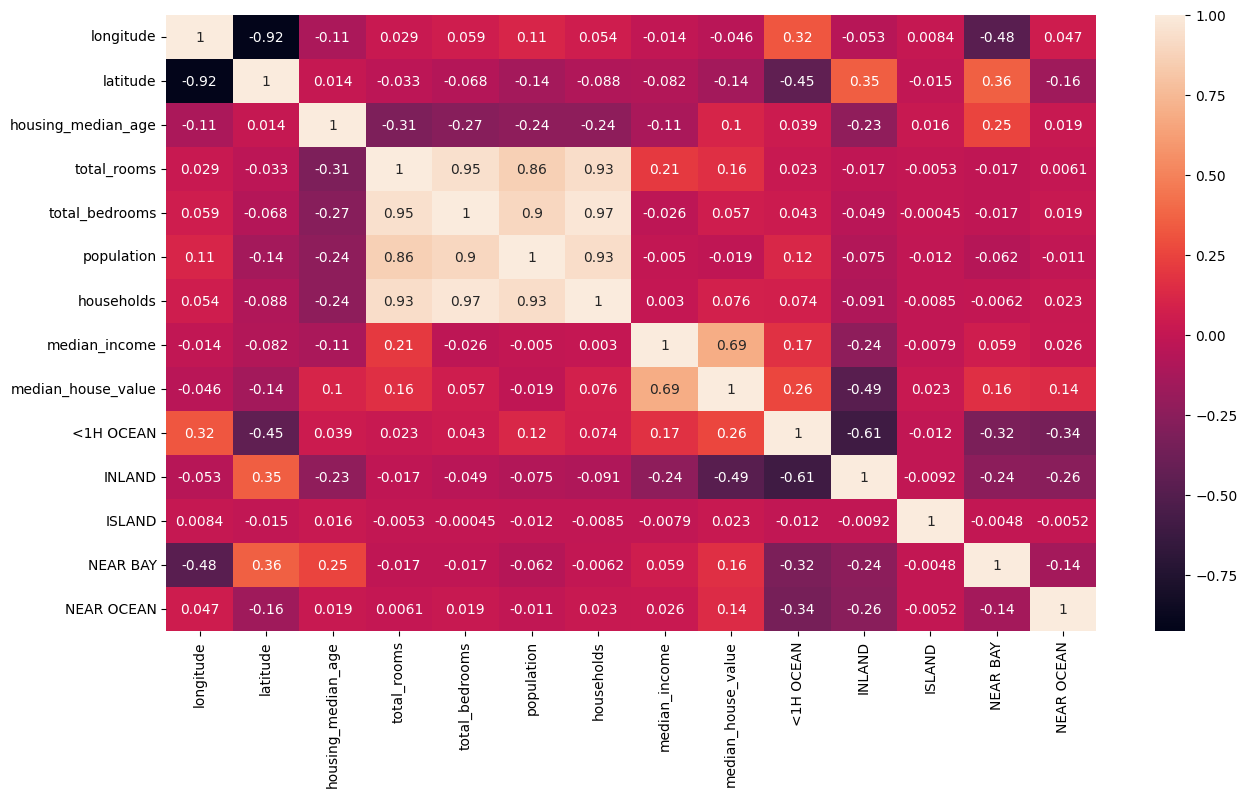

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True)

<Axes: xlabel='longitude', ylabel='latitude'>

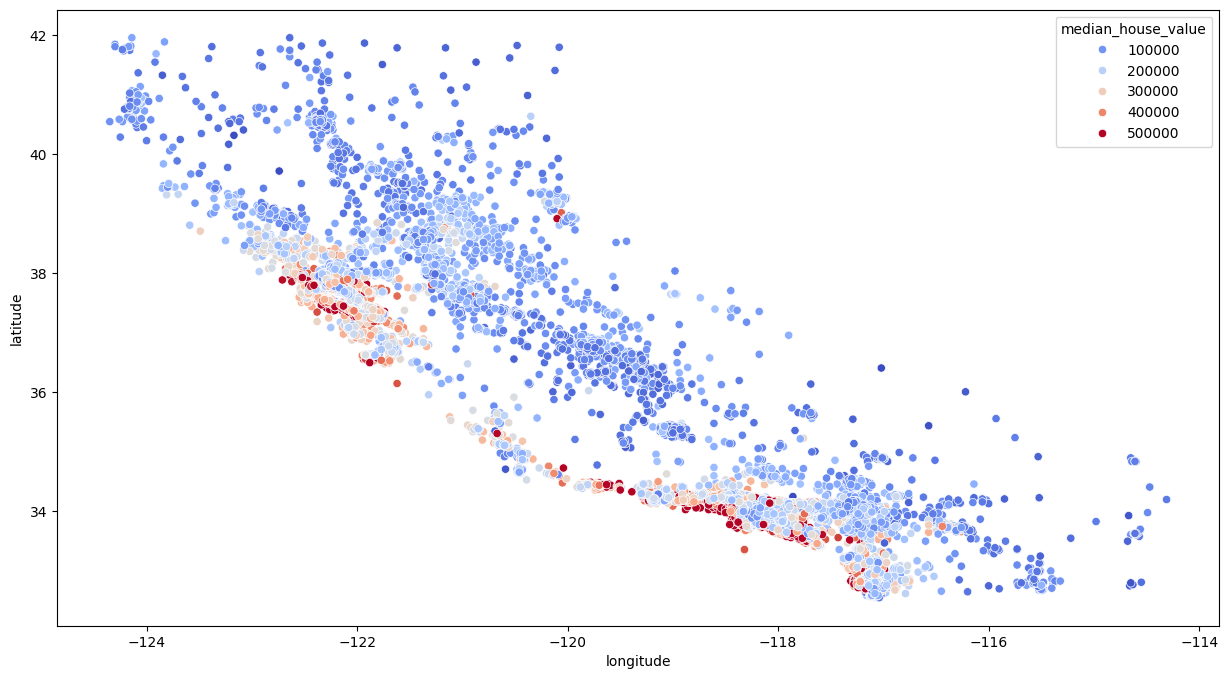

In [18]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=train_data, x='longitude', y='latitude', hue='median_house_value', palette='coolwarm')

In [19]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

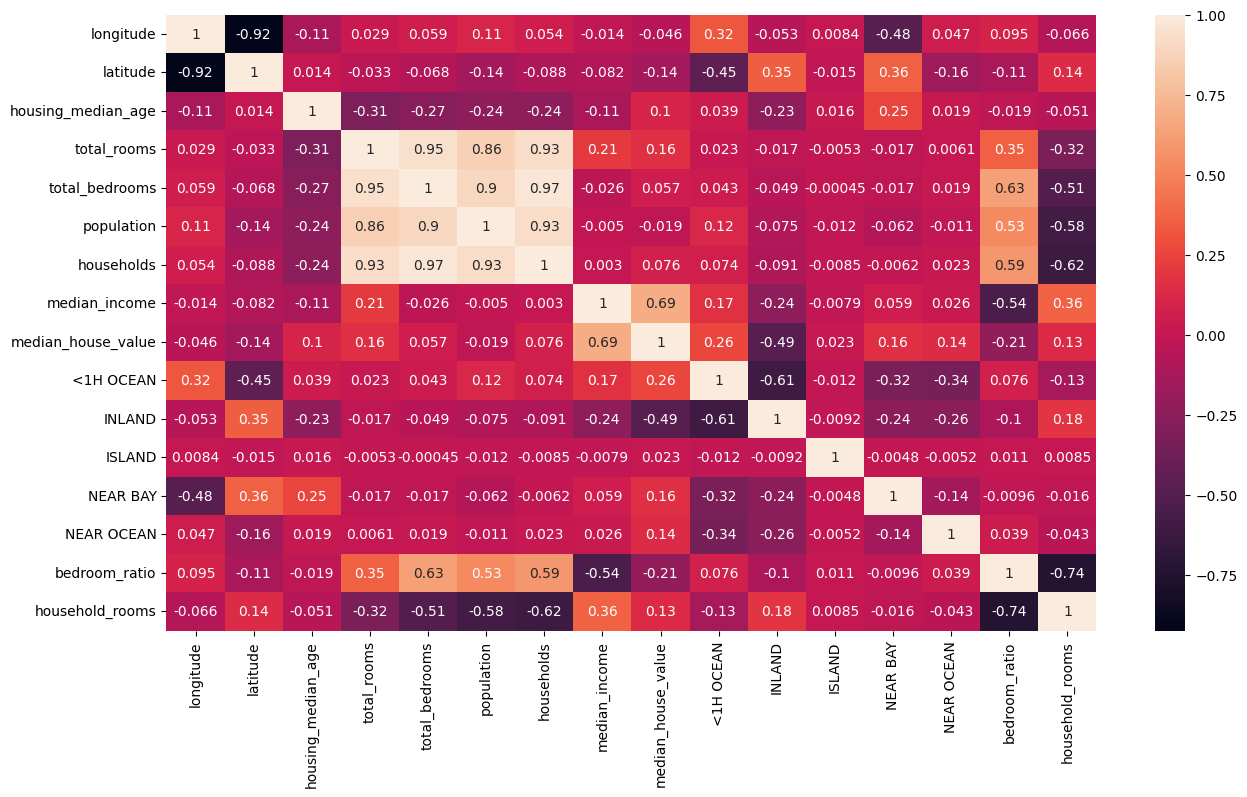

In [20]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train, Y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scalar.fit_transform(X_train)
reg = LinearRegression()

reg.fit(X_train_s, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
test_data = X_test.join(Y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']) + 1
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']) + 1
test_data['population'] = np.log(test_data['population']) + 1
test_data['households'] = np.log(test_data['households']) + 1

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [23]:
X_test, Y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [24]:
X_test_s = scalar.transform(X_test)

In [25]:
reg.score(X_test_s, Y_test)

0.6584669602802875

In [26]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
forest.score(X_test_s, Y_test)

0.8059965829551404

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [3, 10, 30],
    'max_features': [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train_s, Y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,30


In [29]:
best_forest = grid_search.best_estimator_

In [30]:
best_forest.score(X_test_s, Y_test)

0.7961510370751144

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train_s, Y_train)

gb_regressor.score(X_test_s, Y_test)

0.7547688215024811

In [34]:
lr_pred = reg.predict(X_test_s)
lr_rmse = np.sqrt(mean_squared_error(Y_test, lr_pred))
lr_r2 = r2_score(Y_test, lr_pred)

rf_pred = forest.predict(X_test_s)
rf_rmse = np.sqrt(mean_squared_error(Y_test, rf_pred))
rf_r2 = r2_score(Y_test, rf_pred)

gb_pred = gb_regressor.predict(X_test_s)
gb_rmse = np.sqrt(mean_squared_error(Y_test, gb_pred))
gb_r2 = r2_score(Y_test, gb_pred)

results = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'RMSE': [lr_rmse, rf_rmse, gb_rmse],
    'R²': [lr_r2, rf_r2, gb_r2],
    'Score': [reg.score(X_test_s, Y_test), forest.score(X_test_s, Y_test), gb_regressor.score(X_test_s, Y_test)]
}

comparison_df = pd.DataFrame(results)
print(comparison_df)


               Model          RMSE        R²     Score
0  Linear Regression  67148.181499  0.658467  0.658467
1      Random Forest  50608.397252  0.805997  0.805997
2  Gradient Boosting  56899.144480  0.754769  0.754769


In [33]:
import joblib

joblib.dump(reg, 'linear_regressor.pkl')
joblib.dump(forest, 'random_forest_model.pkl')
joblib.dump(gb_regressor, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']

So, According to the Scores: Random Forest is the Best Model Among three of them.

The Model Training Completes here, Models are saved according to their names in the folder.

Please Open Predictor.ipynb to test all the models 🙏🏻